In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

from unified_microphysics.tests.test_common import um_constants

100 100


/usr/lib/pymodules/python2.7/matplotlib/axes.py:2667: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  + 'bottom=%s, top=%s') % (bottom, top))


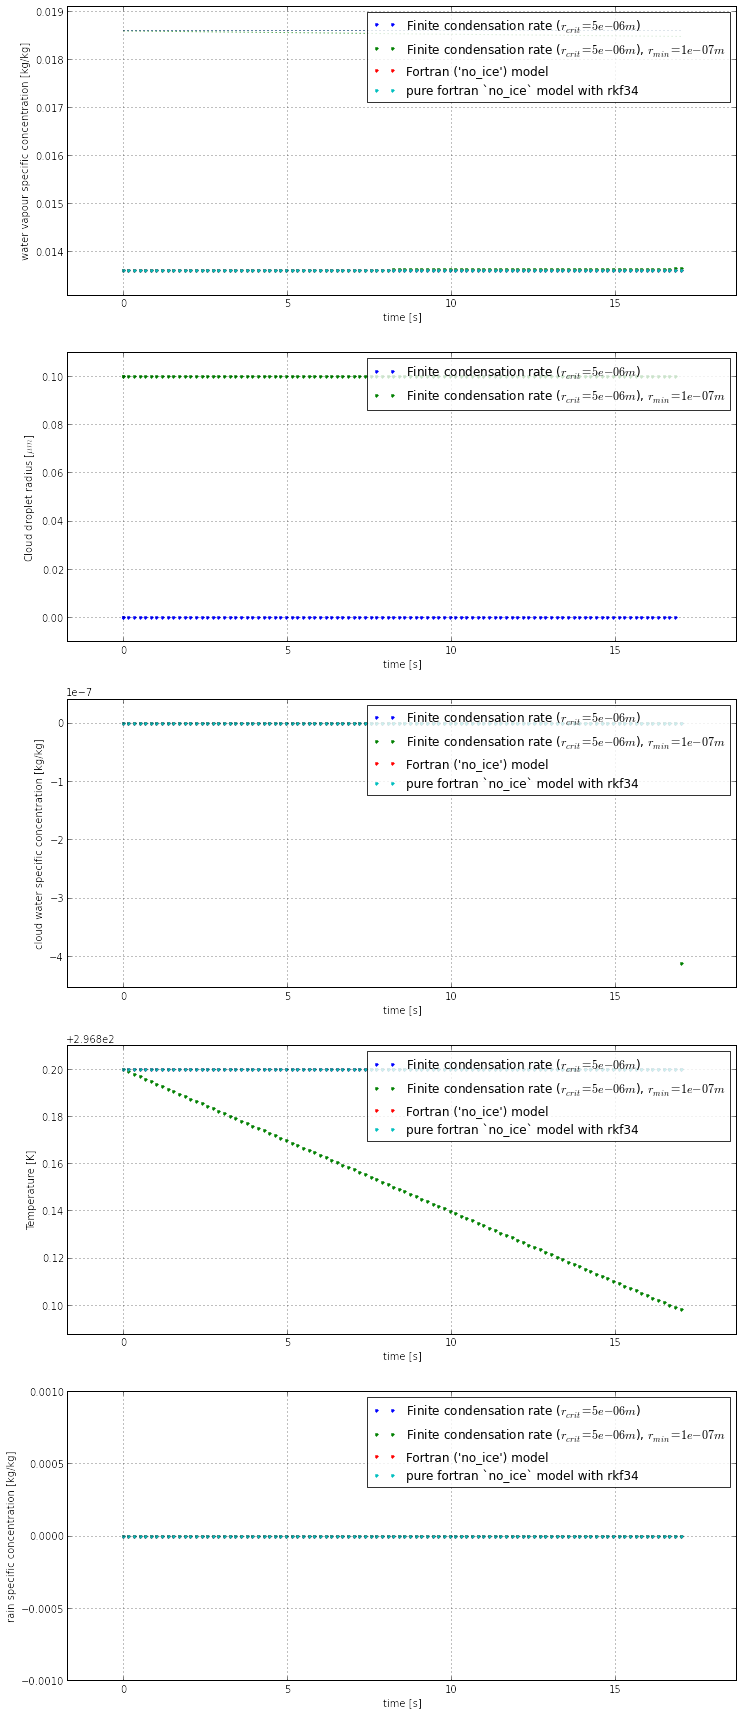

In [4]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 1.36e-2
initial_condition[Var.q_l] = 2.0e-132

initial_condition[Var.T] = 297.
p0 = 99835.  # [Pa]

t_ = np.linspace(0., 17., 100)

SolverClass = odespy.Euler

solutions = []
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=6e-6, constants=um_constants).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=um_constants).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FC_min_radius(constants=um_constants).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))

solutions.append(cloud_microphysics.FortranNoIceMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.ExplicitFortranModel().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))


#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'r_c', 'q_l', 'T', 'q_r'], legend_loc='upper right')

In [ ]:
solution = solutions[0]
Var.print_formatted(solution.F[-1])

In [ ]:
model = cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=um_constants)
Var.print_formatted(model.dFdt(F=initial_condition, p=p0, t=0.0))

In [ ]:
print p0